## Perkenalan

Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

● Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn

● Mampu mempersiapkan data untuk digunakan dalam Clustering

● Mampu mengimplementasikan Clustering pada data yang diberikan


Menggunakan data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut.

## Import Pustaka

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import pickle

## Data Loading

In [218]:
df = pd.read_csv("dataset/CC GENERAL.csv")

In [219]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

## Data Cleaning

In [221]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [222]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [223]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [224]:
df = df.drop('CUST_ID', 1)

In [225]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Explorasi Data

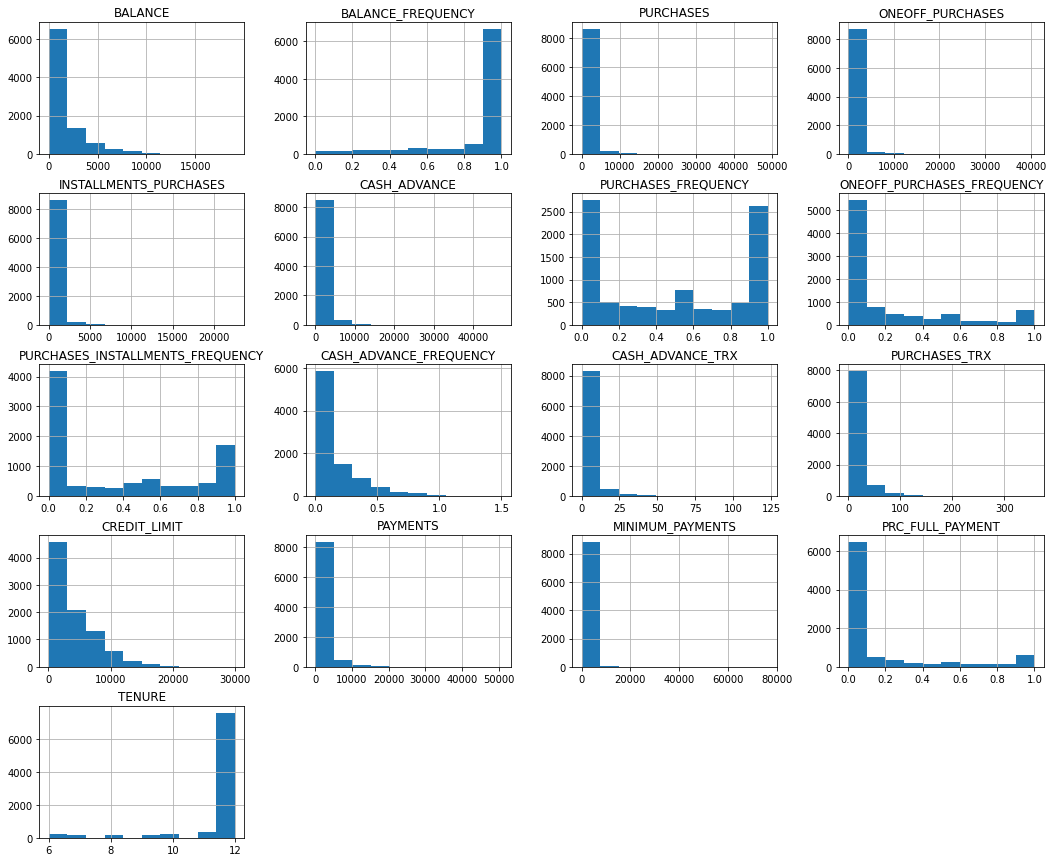

In [226]:
df.hist(figsize=(18,15));

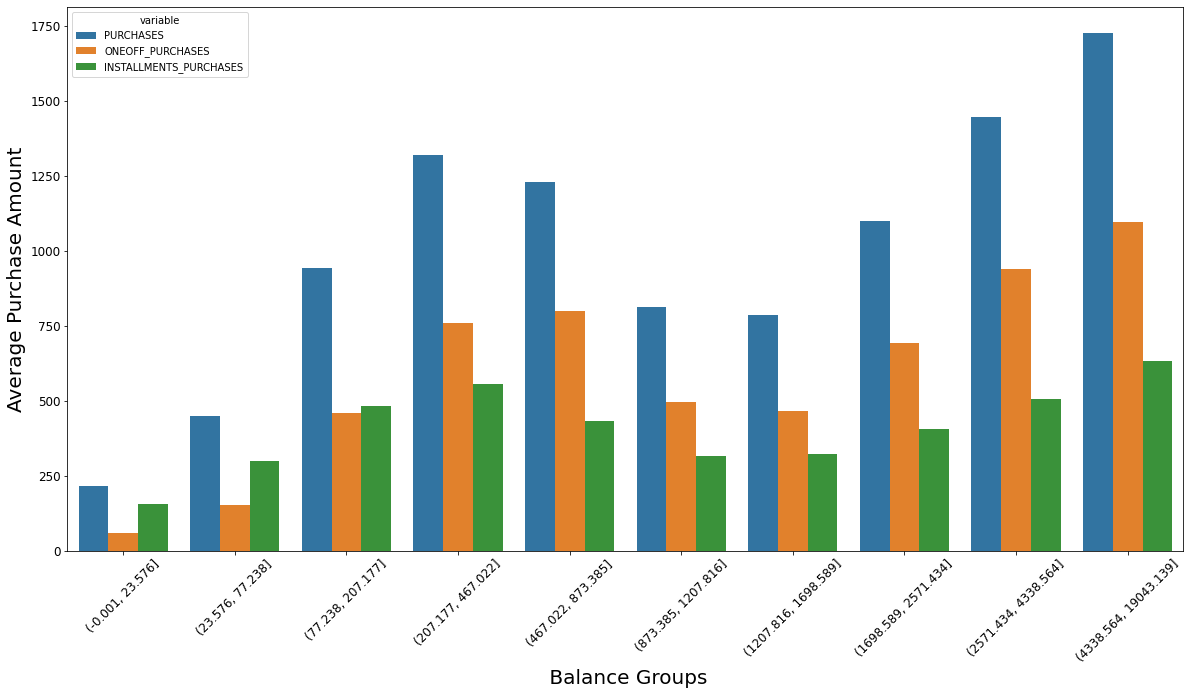

In [227]:
df['Balance_decile'] = pd.qcut(df['BALANCE'], q=10)
data_grp   = df.groupby('Balance_decile', as_index=False).mean()
data_grp   = data_grp[['Balance_decile', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']]
data_grp_t = pd.melt(data_grp, id_vars = 'Balance_decile')

fig = plt.figure(figsize=(20,10))
sns.barplot(x= "Balance_decile" , y = "value", hue = 'variable', data =data_grp_t)
plt.ylabel("Average Purchase Amount", fontsize=20)
plt.xlabel(" Balance Groups", fontsize =20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

Disini terlihat bahwa pelanggan yang memiliki Saldo di kisaran menengah memiliki lebih banyak pembelian, pembelian satu kali dibandingkan dengan pelanggan yang memiliki Saldo di persentil ke-50-75.

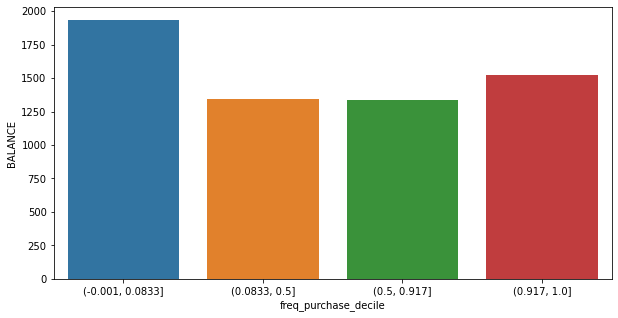

In [228]:
df['freq_purchase_decile'] = pd.qcut(df['PURCHASES_FREQUENCY'], q=4)

data_bal   = df.groupby('freq_purchase_decile', as_index=False).mean()
fig = plt.figure(figsize=(10,5))
sns.barplot(x= "freq_purchase_decile" , y = "BALANCE", data =data_bal)
plt.show()

Pelanggan dengan frekuensi pembelian yang lebih rendah memiliki Saldo rata-rata yang lebih banyak dibandingkan dengan pelanggan yang memiliki frekuensi pembelian yang lebih tinggi.

## Data Preprocessing

In [229]:
df = df.drop(['Balance_decile','freq_purchase_decile'], axis=1)

In [230]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(8950, 17)

In [231]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [232]:
df_fix = pd.DataFrame(df_scaled, columns=df.columns)

<AxesSubplot:>

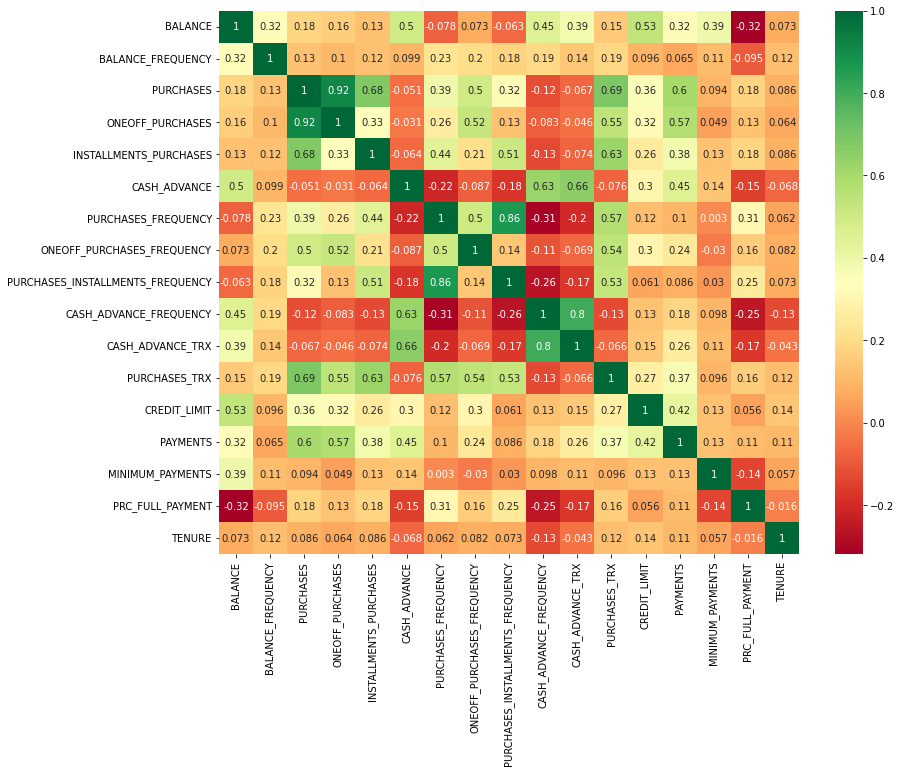

In [233]:
corr = df_fix.corr()
top_corr = corr.index
plt.figure(figsize=(13,10))
sns.heatmap(df_fix[top_corr].corr(),annot=True,cmap="RdYlGn")

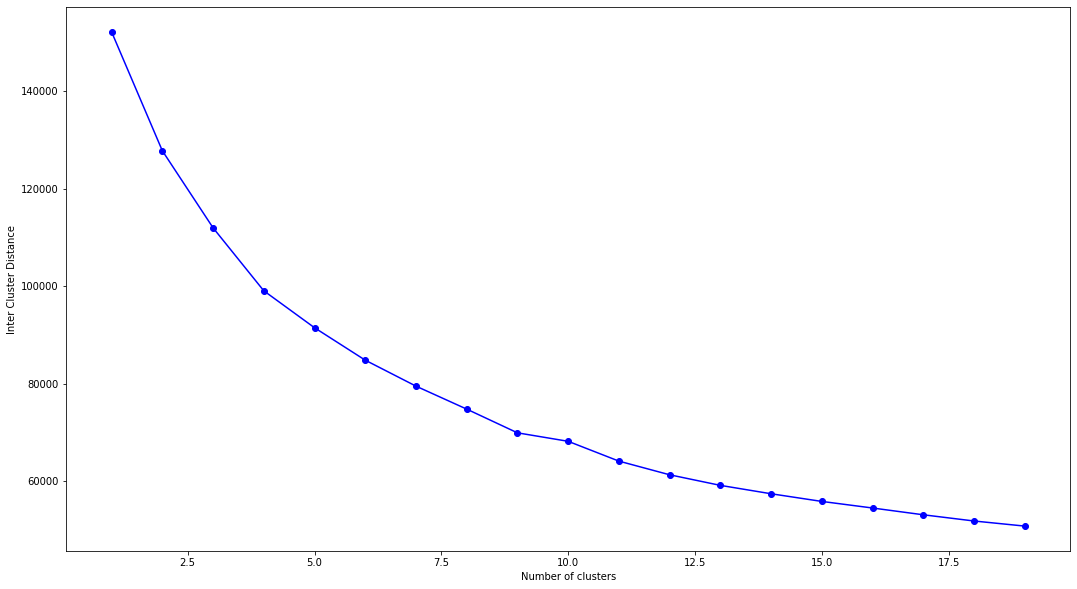

In [234]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(df_fix)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(18,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

Berdasarkan grafik di atas kita mengambil 6 cluster

In [235]:
km = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=42)
km.fit(df_fix)
y_pred = km.predict(df_fix)

In [236]:
df_cluster = pd.DataFrame(df_fix,columns = df_fix.columns)
df_cluster['CLUSTERS'] = y_pred
df_cluster.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,4
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,3
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,0
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740557,-0.115060,6.621186e-01,-0.525551,0.36068,2
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475134,1.596313,-2.858411e-01,2.893453,0.36068,3
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.603134,-0.364116,-1.425353e-01,-0.525551,0.36068,2
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688639,-0.360933,-2.369677e-01,-0.525551,0.36068,0
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788021,-0.196336,-3.277915e-01,-0.525551,0.36068,1


In [237]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [238]:
df_cluster['CLUSTERS'].value_counts()

0    3040
2    2229
3    1323
1    1311
4     965
5      82
Name: CLUSTERS, dtype: int64

In [260]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
df_final = pd.DataFrame(df_cluster[best_cols])

In [261]:
df_final

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,-0.731989,-0.424900,-0.466786,-0.960433,-0.528979,-3.109675e-01
1,0.786961,-0.469552,2.605605,0.688639,0.818642,8.931021e-02
2,0.447135,-0.107668,-0.466786,0.826062,-0.383805,-1.016632e-01
3,0.049099,0.232058,-0.368653,0.826062,-0.598688,4.878305e-17
4,-0.358775,-0.462063,-0.466786,-0.905464,-0.364368,-2.657913e-01
...,...,...,...,...,...,...
8945,-0.737950,-0.333293,-0.466786,-0.960433,-0.486217,-3.498541e-01
8946,-0.742423,-0.329136,-0.466786,-0.960433,-0.503396,4.878305e-17
8947,-0.740398,-0.401965,-0.466786,-0.960433,-0.570615,-3.354655e-01
8948,-0.745174,-0.469552,-0.449352,-1.097856,-0.580536,-3.469065e-01


In [262]:
alg = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=35)
model_km = alg.fit(df_final)
y_pred = alg.predict(df_final)

# # create a 'cluster' column
# df_final['cluster'] = model_km
# best_cols.append('cluster')

In [263]:
clus_df = pd.DataFrame(df_final,columns = df_final.columns)
clus_df['CLUSTERS'] = y_pred
clus_df.head(10)

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,CLUSTERS
0,-0.731989,-0.424900,-0.466786,-0.960433,-0.528979,-3.109675e-01,1
1,0.786961,-0.469552,2.605605,0.688639,0.818642,8.931021e-02,0
2,0.447135,-0.107668,-0.466786,0.826062,-0.383805,-1.016632e-01,4
3,0.049099,0.232058,-0.368653,0.826062,-0.598688,4.878305e-17,4
4,-0.358775,-0.462063,-0.466786,-0.905464,-0.364368,-2.657913e-01,1
5,0.117878,0.154492,-0.466786,-0.740557,-0.115060,6.621186e-01,1
6,-0.450277,2.849408,-0.466786,2.475134,1.596313,-2.858411e-01,4
7,0.124520,-0.265388,-0.466786,-0.603134,-0.364116,-1.425353e-01,1
8,-0.264026,-0.066330,-0.466786,0.688639,-0.360933,-2.369677e-01,1
9,-0.678504,0.130303,-0.466786,1.788021,-0.196336,-3.277915e-01,4


In [265]:
clus_df['CLUSTERS'].value_counts()

1    6122
4    1486
0    1133
3     125
2      54
5      30
Name: CLUSTERS, dtype: int64

### Analisis Cluster

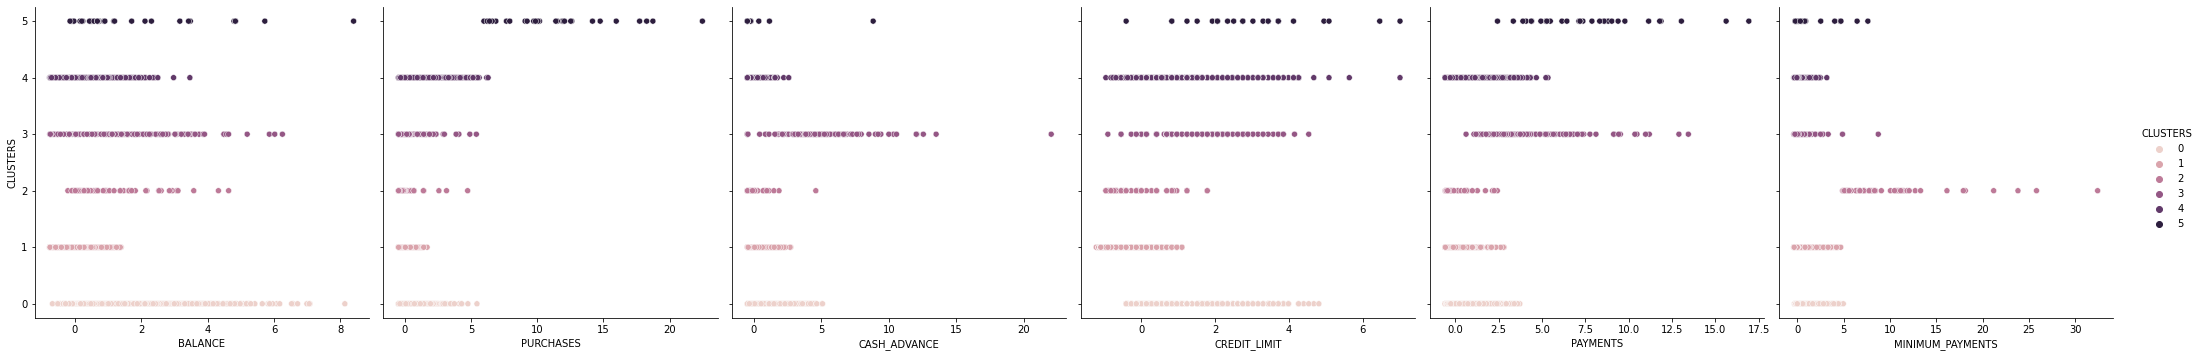

In [264]:
sns.pairplot(clus_df, hue='CLUSTERS', x_vars=["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"],
            y_vars=['CLUSTERS'],
            height=5, aspect=1)

   ● **Cluster 0 :** 
   
    - Memiliki saldo yang tertinggi

    - Jumlah pembelian rata-rata

    - Penarikan tunai yang tertinggi ke 2

    - Memiliki limit credit terbesar ke 3

    - Jumlah pembayaran yang rata-rata

    - Memiliki minimal pembayaran rata-rata

   **Cluster ini mempunyai saldo dan credit limit yang besar tetapi termasuk hemat**

   ● **Cluster 1 :** 
   
    - Memiliki saldo terendah

    - Punya jumlah pembelian paling kecil

    - Penarikan tunai yang rata-rata

    - Memiliki limit credit yang kecil 

    - Jumlah pembayaran terendah ke 2

    - Memiliki minimal pembayaran rata-rata

   **Cluster pengguna ini, meskipun memiliki jumlah pengguna tertinggi sejauh ini, cukup hemat di bandingkan cluster yang lain.**

● **Cluster 2 :** 

    - Memiliki saldo terendah ke 3

    - Punya jumlah pembelian rata-rata 

    - Penarikan tunai terendah ke 2

    - Memiliki limit credit yang kecil 

    - Jumlah pembayaran yang rendah

    - Tetapi memilki minimal pembayaran yang paling tinggi
    

   **Cluster ini memiliki pembayaran minimum yang sangat tinggi sementara memiliki batas kredit terendah kedua. Sepertinya bank telah mengidentifikasi mereka sebagai risiko yang lebih tinggi.**

   ● **Cluster 3 :** 
   
    - Memiliki saldo yang bervariasi

    - Jumlah pembelian rata-rata

    - Penarikan tunai yang paling tinggi

    - Memiliki limit credit yang besar ke 2

    - Jumlah pembayaran yang tertinggi ke 2

    - Memiliki minimal pembayaran rata-rata

   **Hal yang paling menonjol pada cluster ini adalah bahwa orang-orang ini memiliki penarikan tunai tertinggi sejauh ini**

   ● **Cluster 4 :** 
   
    - Memiliki saldo terendah ke 2

    - Jumlah pembelian teringgi ke 2 kecil

    - Penarikan tunai terendah pertama

    - Memiliki limit credit yang besar

    - Jumlah pembayaran yang tertinggi ke 3

    - Memiliki minimal pembayaran yang paling rendah

   **Cluster pengguna ini secara umum sangat aktif yang bisa dibilang paling ideal**

   ● **Cluster 5 :** 
   
    - Memiliki saldo yang sangat bervariasi

    - Jumlah pembelian yang paling tinggi

    - Penarikan tunai yang paling kecil

    - Memiliki limit credit terbesar ke 2 

    - Jumlah pembayaran yang tertinggi pertama dan bervariasi

    - Memiliki minimal pembayaran rata-rata dan bervariasi

   **Cluster ini merupakan yang terboros dibanding yang lain dan memiliki banyak outlier**

   

### Membuat cluster pada feature Balance dan Purchases

In [244]:
X = df_final[['BALANCE','PURCHASES']].to_numpy()

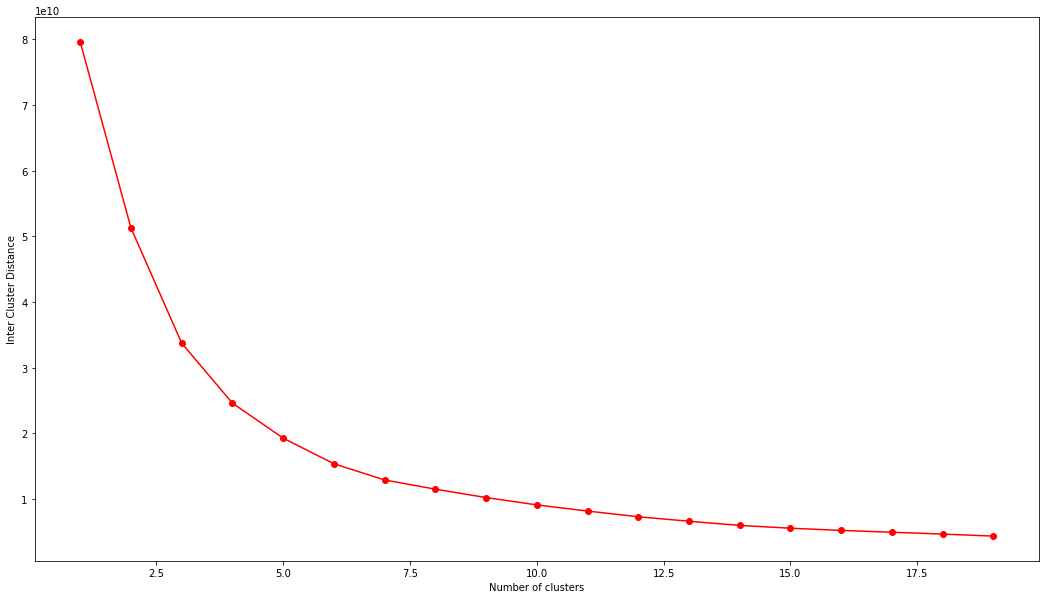

In [245]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(X)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(18,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

Dari grafik di atas kita mengasusikan bahwa ada 4 cluster

In [246]:
km = KMeans(n_clusters = 4,init ='k-means++', max_iter=300,random_state=42)
km.fit(X)
y_balance_pred = km.predict(X)

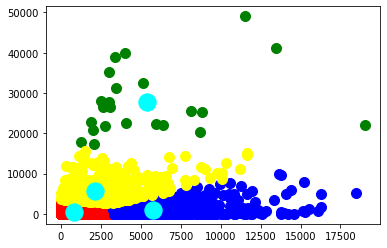

In [247]:
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=100, c='yellow', label ='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='cyan', label = 'Centroids')
plt.show()

## DBSCAN

In [248]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(df_fix)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [249]:
dbscan_df = pd.DataFrame(df_fix,columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,0
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740557,-0.115060,6.621186e-01,-0.525551,0.36068,0
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475134,1.596313,-2.858411e-01,2.893453,0.36068,-1
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.603134,-0.364116,-1.425353e-01,-0.525551,0.36068,0
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688639,-0.360933,-2.369677e-01,-0.525551,0.36068,0
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788021,-0.196336,-3.277915e-01,-0.525551,0.36068,0


In [250]:
dbscan_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000
mean,-2.540488e-17,1.587805e-16,3.175610e-18,-6.033659e-17,3.175610e-17,-6.351220e-18,9.328354e-17,1.905366e-17,5.716098e-17,-1.595744e-16,-1.746585e-17,-1.905366e-17,2.032390e-16,-2.540488e-17,2.699268e-17,-9.526830e-18,2.921561e-16,-0.075642
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.266963
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221536e+00,-5.986883e-01,-3.708230e-01,-5.255510e-01,-4.122768e+00,-1.000000
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.955261e-01,-4.662913e-01,-2.975162e-01,-5.255510e-01,3.606795e-01,0.000000
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.107426e-01,-3.026846e-01,-2.268130e-01,-5.255510e-01,3.606795e-01,0.000000
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512163e-01,5.802976e-02,4.878305e-17,-3.712234e-02,3.606795e-01,0.000000
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010083e+00,1.692228e+01,3.241509e+01,2.893453e+00,3.606795e-01,1.000000


In [251]:
dbscan_df['clusters'].value_counts()

 0    8261
-1     683
 1       6
Name: clusters, dtype: int64

In [252]:
X = dbscan_df[['BALANCE','PURCHASES']].to_numpy()

In [253]:
dbscan = DBSCAN(eps=0.075,min_samples=2)
dbscan.fit(X)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

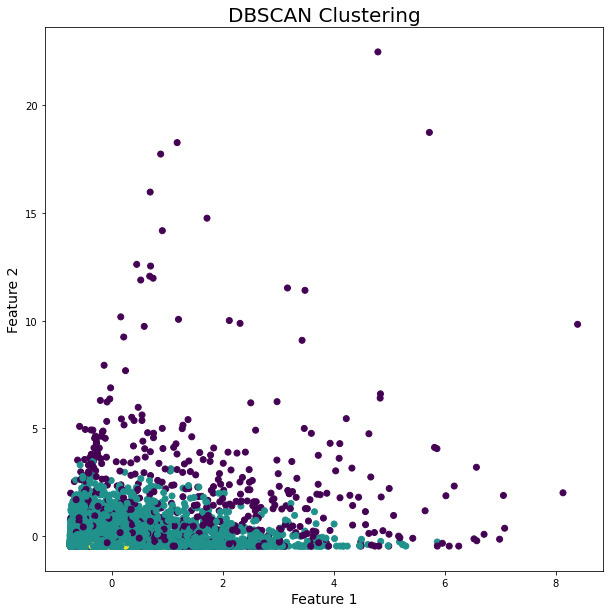

In [254]:
plt.figure(figsize=(10,10))
plt.scatter(dbscan_df['BALANCE'],dbscan_df['PURCHASES'],c=dbscan_df['clusters'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Prediksi

In [259]:
BALANCE = float(input("BALANCE: "))
PURCHASES = float(input("PURCHASES: "))
CASH_ADVANCE = float(input("CASH_ADVANCE: "))
CREDIT_LIMIT = float(input("CREDIT_LIMIT: "))
PAYMENTS = float(input("PAYMENTS: "))
MINIMUM_PAYMENTS = float(input("MINIMUM_PAYMENTS: "))

feature = [BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS]

feature = scaler.fit_transform([feature])

predict = model_km.predict(feature)
print("Cluster : ",predict)

Cluster :  [0]


In [257]:
pickle.dump(model_km, open('model_km.pkl','wb'))

In [258]:
pickle.dump(scaler, open('model_scaler.pkl','wb'))